<a href="https://colab.research.google.com/github/PritiP12/Machine_Learning/blob/master/ML_revenue_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## Load libraries
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd

In [0]:
##load data
train = pd.read_csv('/content/res_train.csv')
test = pd.read_csv('/content/res_test.csv')

In [0]:
## Descriptive data
print("Train :",train.shape)
print("Test:",test.shape)

Train : (137, 43)
Test: (100000, 42)


In [0]:
### get column with null values  
train.columns[train.isna().any()].tolist()

[]

In [0]:
train['Open Date'] = pd.to_datetime(train['Open Date'])
test['Open Date'] = pd.to_datetime(test['Open Date'])

In [0]:
#Seperate categorical from numberical variables for analysis 

numerical_features = train.select_dtypes([np.number]).copy()
numerical_cols = numerical_features.columns

categorical_features = train.select_dtypes(exclude = [np.number,np.datetime64]).copy()
categorical_cols = categorical_features.columns

In [0]:
print(numerical_cols)
print("*"*100)
print(categorical_cols)

Index(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue'],
      dtype='object')
****************************************************************************************************
Index(['City', 'City Group', 'Type'], dtype='object')


In [0]:
##Analyzing Numerical Variables

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64
Skewness: 2.793479


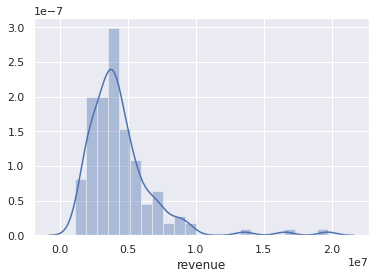

In [0]:
# Check the target column distribution ['revenue']:

print(train['revenue'].describe())
sns.distplot(train['revenue']);
#skewness
print("Skewness: %f" % train['revenue'].skew())

In [0]:
## finding skewness and taking log for numerical data:

class skew_dict(dict):
  def __init__(self): 
        self = dict() 

  def add(self,key,value):
    self[key]=value

skewd=skew_dict()
#kurtd=skew_dict()
for i in numerical_cols:
        skewd.add(i,numerical_features[i].skew())

for j in skewd:
  if (skewd[j] < -0.5) or (skewd[j] > 0.5):
    print(j)
    print('{0}_Log'.format(j))
    numerical_features['{0}_Log'.format(j)]=np.log(numerical_features[j])
    numerical_features.drop(j,inplace=True,axis=1)

numerical_features.replace([-np.inf],0,inplace = True)
numerical_features

In [0]:
# Applying label encoding on categorical data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in categorical_cols:
  categorical_features[i]=le.fit_transform(categorical_features[i])
categorical_features

In [0]:
#finding skewness and taking log for categorical data

class skew_dict(dict):
  def __init__(self): 
        self = dict() 

  def add(self,key,value):
    self[key]=value

skewd=skew_dict()
#kurtd=skew_dict()
for i in categorical_cols:
        skewd.add(i,categorical_features[i].skew())
        #kurtd.add(i,train_numerical[i].kurt())
print(skewd)

for j in skewd:
  if (skewd[j] < -0.5) or (skewd[j] > 0.5):
    print(j)
    print('{0}_Log'.format(j))
    categorical_features['{0}_Log'.format(j)]=np.log(categorical_features[j])
    categorical_features.drop(j,inplace=True,axis=1)
#Replacing nan and -infs with 0

categorical_features.replace([-np.inf],0,inplace = True)
categorical_features

In [0]:
#replacing column name with transforemd log column name
numerical_cols=numerical_features.columns
categorical_cols=categorical_features.columns
#numerical_cols
categorical_cols

In [0]:
# taking revenue in 1 dataframe for both categorical and numerical plotting
revenue_Log_df=pd.DataFrame()
revenue_Log_df['revenue_Log']=np.log(train['revenue']).copy()
revenue_Log_df

In [0]:
#plotting correlation for numerical features

from scipy.stats.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
numerical_corr=pd.DataFrame()
nr=13
nc=3
fig, axes = plt.subplots(nr,nc, figsize=(10,30))
#train_numerical_col=train_numerical.columns

for r in range(0,13,1):
  for c in range (0,3,1):
      i=r*nc+c
      try:
        #sns.regplot(df_train[li_plot_num_feats[i]], df_train[target], ax = axs[r][c])
        #stp = stats.pearsonr(df_train[li_plot_num_feats[i]], df_train[target])


        corr, p_value = pearsonr(numerical_features[numerical_cols[i]], revenue_Log_df['revenue_Log'])
        sns.regplot(x=numerical_features[numerical_cols[i]], y=revenue_Log_df['revenue_Log'],ax=axes[r][c])
        if (corr < -0.08) or (corr > 0.08):
            numerical_corr[numerical_cols[i]]=numerical_features[numerical_cols[i]].copy()
        axes[r][c].set_xlabel(numerical_cols[i],labelpad=3,fontsize=15)
        axes[r][c].set_ylabel('revenue_Log',fontsize=20)
        axes[r][c].set_title('corr:{0:4.2f}'.format(corr),size=20)
        
      except IndexError as error:
        print("Running!!!") 
fig.tight_layout()
plt.savefig('correlation.jpg')
plt.show()

In [0]:
#plotting correlation for categorical features

from scipy.stats.stats import pearsonr
categorical_corr=pd.DataFrame()
nr=2
nc=3
fig, axes = plt.subplots(nr,nc, figsize=(10,20))
count=1
for r in range(0,2,1):
  for c in range (0,3,1):
      i=r*nc+c
      try:
        corr, p_value = pearsonr(categorical_features[categorical_cols[i]], y=revenue_Log_df['revenue_Log'])
        sns.regplot(x=categorical_features[categorical_cols[i]], y=revenue_Log_df['revenue_Log'],ax=axes[r][c])
        if (corr < -0.06) or (corr > 0.06):
          categorical_corr[categorical_cols[i]]=categorical_features[categorical_cols[i]]
        axes[r][c].set_xlabel(categorical_cols[i],labelpad=3,fontsize=15)
        axes[r][c].set_ylabel('revenue_Log',fontsize=20)
        axes[r][c].set_title('corr:{0:4.2f}'.format(corr),size=20)
        count=count+1
      except IndexError as error:
        print("Running!!!") 
fig.tight_layout()
plt.savefig('correlation.jpg')
plt.show()

In [0]:
numerical_corr

In [0]:
categorical_corr

In [0]:
#concatenating both dataframe
train_cat_num=pd.DataFrame()
train_cat_num=pd.concat([numerical_corr,categorical_corr],axis=1)
train_cat_num

In [0]:
corr_heatmap=train_cat_num.corr()
corr_heatmap

In [0]:
### Features with largest correlation

for i in corr_heatmap:
  for j in corr_heatmap[i]:
     if (j>-0.55) and (j<0.8):
       corr_heatmap.replace(to_replace =j,value= np.nan,inplace=True) 

fig, ax = plt.subplots(figsize=(15,7)) 
sns.heatmap(corr_heatmap, annot = True,linewidths=.5)

In [0]:
#to_drop = [column for column in train_cat_num if any(train_cat_num[column] > 0.96)]


In [0]:
## drop minimum correlated features
[train_cat_num.drop(col ,axis=1,inplace=True) for col in train_cat_num if col not in ['P2','P1_Log','P24_Log','P25_Log','revenue_Log']]

[None, None, None, None, None, None, None, None, None, None, None, None]

In [0]:
train_cat_num

In [0]:
### build model

from sklearn.model_selection import train_test_split

X = train_cat_num[['P2','P1_Log','P24_Log','P25_Log']]
y = train_cat_num['revenue_Log']

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

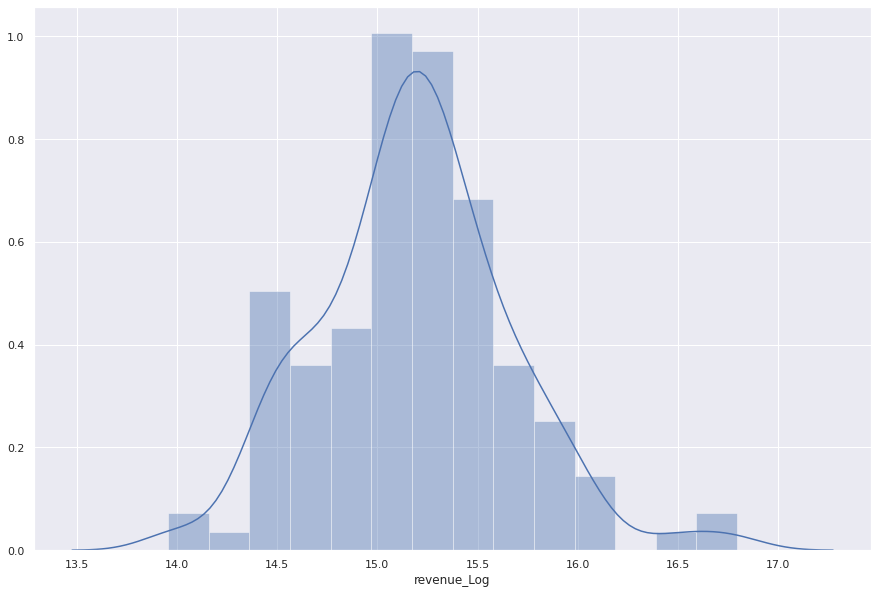

In [0]:
import seaborn as seabornInstance

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(train_cat_num['revenue_Log'])

In [0]:
#To see what coefficients our regression model has choosen
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

from sklearn.linear_model import LinearRegression

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

In [0]:
y_pred = regressor.predict(X_test)

In [0]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df.head(25)

,Actual,Predicted
26,14.634155,15.289053
8,15.415402,15.044554
86,15.024884,15.011963
78,15.169112,15.486058
43,14.820781,15.171102
85,15.829759,15.230753
22,15.190766,15.205366
50,14.583811,15.289053
45,15.138035,15.255110
24,16.002021,15.226383


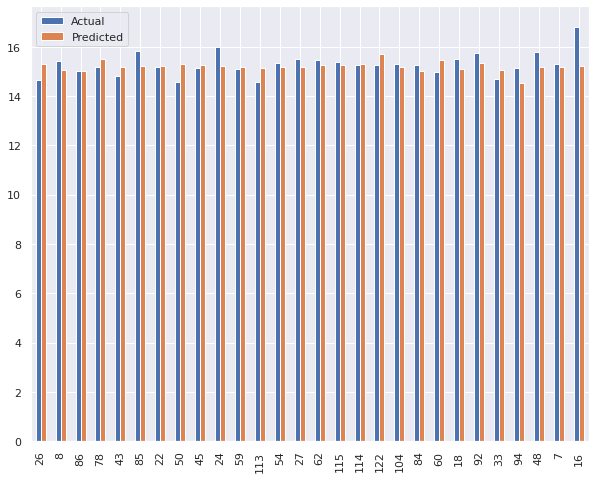

In [0]:
#plot the comparison of Actual and Predicted values

df.plot(kind='bar',figsize=(10,8))
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3866506766727702
Mean Squared Error: 0.2479279050774673
Root Mean Squared Error: 0.4979235936139874
